In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [3]:
df = pd.read_csv(data)
df.head().T 


,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [4]:
df.columns = df.columns.str.lower().str.replace(' ','_')
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
for col in categorical_columns :
    df[col] = df[col].str.lower().str.replace(' ','_')

In [5]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [6]:
df.totalcharges = pd.to_numeric(df.totalcharges,errors= 'coerce')

In [7]:
df.totalcharges = df.totalcharges.fillna(0)

In [8]:
df.churn = (df.churn == 'yes').astype(int)

In [9]:
df.churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int64

In [10]:
## Sklearn
from sklearn.model_selection import train_test_split
df_full_train , df_test = train_test_split(df,test_size=0.2, random_state=1)  ## full train 80% and 20% test , fulltrain will later be divided to train and validation

In [11]:
df_train ,df_val = train_test_split(df_full_train,test_size=0.25, random_state=1)

In [12]:
len(df_train),len(df_val),len(df_test)

(4225, 1409, 1409)

In [13]:
df_train  = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [14]:
y_train = df_train.churn.values
y_test = df_test.churn.values
y_val = df_val.churn.values
del df_train['churn']
del df_test['churn']
del df_val['churn']

In [15]:
df_full_train = df_full_train.reset_index(drop=True) 

In [16]:
df_full_train.fillna(0)
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [17]:
df_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [18]:
global_churn_rate = round(np.mean(df_full_train.churn),2)
global_churn_rate

np.float64(0.27)

In [19]:
df_full_train.dtypes # look for numerical variables

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [20]:
numerical = ['tenure','monthlycharges','totalcharges']

In [21]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [22]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [23]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

In [24]:
df_full_train[df_full_train.gender == 'female'].churn.mean()

np.float64(0.27682403433476394)

In [25]:
df_full_train[df_full_train.gender == 'male'].churn.mean()

np.float64(0.2632135306553911)

In [26]:
df_full_train[df_full_train.partner == 'yes'].churn.mean()

np.float64(0.20503330866025166)

In [27]:
df_full_train[df_full_train.partner == 'no'].churn.mean()

np.float64(0.3298090040927694)

In [28]:
## with a partner a customer churn rate is less than the global churn rate

In [29]:
## RISK = Group churn rate / Global churn rate 

In [30]:
df_full_train.groupby('gender').churn.mean().agg(['mean','count'])

mean     0.270019
count    2.000000
Name: churn, dtype: float64

In [31]:
from IPython.display import display

In [32]:
for col in categorical:
    df_group = df_full_train.groupby(by=col).churn.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate
    display(df_group)

,mean,diff,risk
gender,,,
female,0.276824,0.006824,1.025274
male,0.263214,-0.006786,0.974865


,mean,diff,risk
seniorcitizen,,,
0,0.242270,-0.027730,0.897297
1,0.413377,0.143377,1.531027


,mean,diff,risk
partner,,,
no,0.329809,0.059809,1.221515
yes,0.205033,-0.064967,0.759383


,mean,diff,risk
dependents,,,
no,0.313760,0.043760,1.162074
yes,0.165666,-0.104334,0.613579


,mean,diff,risk
phoneservice,,,
no,0.241316,-0.028684,0.893764
yes,0.273049,0.003049,1.011292


,mean,diff,risk
multiplelines,,,
no,0.257407,-0.012593,0.953361
no_phone_service,0.241316,-0.028684,0.893764
yes,0.290742,0.020742,1.076820


,mean,diff,risk
internetservice,,,
dsl,0.192347,-0.077653,0.712398
fiber_optic,0.425171,0.155171,1.574709
no,0.077805,-0.192195,0.288167


,mean,diff,risk
onlinesecurity,,,
no,0.420921,0.150921,1.558967
no_internet_service,0.077805,-0.192195,0.288167
yes,0.153226,-0.116774,0.567503


,mean,diff,risk
onlinebackup,,,
no,0.404323,0.134323,1.497494
no_internet_service,0.077805,-0.192195,0.288167
yes,0.217232,-0.052768,0.804564


,mean,diff,risk
deviceprotection,,,
no,0.395875,0.125875,1.466205
no_internet_service,0.077805,-0.192195,0.288167
yes,0.230412,-0.039588,0.853379


,mean,diff,risk
techsupport,,,
no,0.418914,0.148914,1.551534
no_internet_service,0.077805,-0.192195,0.288167
yes,0.159926,-0.110074,0.592320


,mean,diff,risk
streamingtv,,,
no,0.342832,0.072832,1.269747
no_internet_service,0.077805,-0.192195,0.288167
yes,0.302723,0.032723,1.121195


,mean,diff,risk
streamingmovies,,,
no,0.338906,0.068906,1.255209
no_internet_service,0.077805,-0.192195,0.288167
yes,0.307273,0.037273,1.138047


,mean,diff,risk
contract,,,
month-to-month,0.431701,0.161701,1.598893
one_year,0.120573,-0.149427,0.446568
two_year,0.028274,-0.241726,0.104718


,mean,diff,risk
paperlessbilling,,,
no,0.172071,-0.097929,0.637300
yes,0.338151,0.068151,1.252412


,mean,diff,risk
paymentmethod,,,
bank_transfer_(automatic),0.168171,-0.101829,0.622854
credit_card_(automatic),0.164339,-0.105661,0.608661
electronic_check,0.455890,0.185890,1.688482
mailed_check,0.193870,-0.076130,0.718036


In [33]:
# whats the most important varibale in our data ?

In [34]:
from sklearn.metrics import mutual_info_score

In [35]:
mutual_info_score(df_full_train.churn , df_full_train.contract)

np.float64(0.0983203874041556)

In [36]:
def mutual_info_churn_score(series):
    return mutual_info_score(series,df_full_train.churn)

In [37]:
df_full_train[categorical].apply(mutual_info_churn_score).sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

In [38]:
df_full_train[numerical].corrwith(df_full_train.churn).sort_values(ascending=False)

monthlycharges    0.196805
totalcharges     -0.196353
tenure           -0.351885
dtype: float64

In [39]:
import matplotlib.pyplot as plt

/tmp/ipykernel_11263/3738328011.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn_rate = df_full_train.groupby('tenure_interval')['churn'].mean().reset_index()


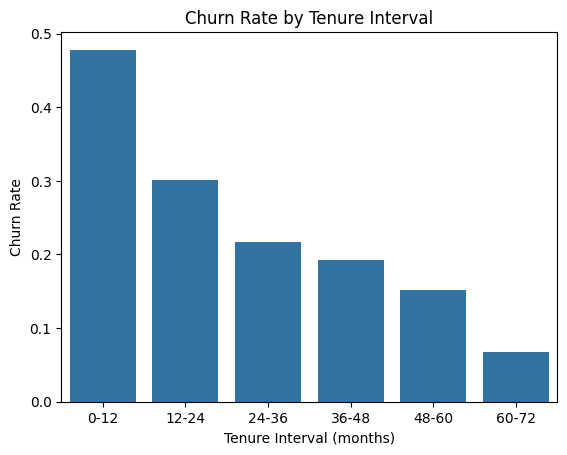

In [40]:
# Create tenure intervals
df_full_train['tenure_interval'] = pd.cut(df_full_train['tenure'], bins=[0, 12, 24, 36, 48, 60, 72], labels=['0-12', '12-24', '24-36', '36-48', '48-60', '60-72'])

# Calculate churn rate for each interval
tenure_churn_rate = df_full_train.groupby('tenure_interval')['churn'].mean().reset_index()

# Plot the distribution
sns.barplot(x='tenure_interval', y='churn', data=tenure_churn_rate)
plt.xlabel('Tenure Interval (months)')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Tenure Interval')
plt.show()

In [41]:
from sklearn.feature_extraction import DictVectorizer


In [42]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
dv = DictVectorizer(sparse=False)

In [43]:
dv.fit(train_dicts)
X_train = dv.transform(train_dicts)
X_val = dv.transform(df_val[categorical + numerical].to_dict(orient='records'))

In [44]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [47]:
model.score(X_train,y_train)

0.8063905325443786

In [48]:
model.coef_[0].round(3) # coefficients of the model

array([ 0.625, -0.02 , -0.722, -0.025, -0.091,  0.056, -0.106, -0.067,
       -0.038, -0.078, -0.361,  0.351, -0.106,  0.001, -0.246,  0.125,
        0.005,  0.061, -0.106, -0.071,  0.228, -0.106, -0.238, -0.241,
        0.125, -0.123,  0.007, -0.093, -0.046,  0.072, -0.049,  0.125,
       -0.241,  0.193, -0.102, -0.106,  0.091, -0.063, -0.106,  0.053,
        0.179, -0.106, -0.19 , -0.069,  0.   ])

In [49]:
model.intercept_[0] # intercept of the model

np.float64(-0.12264242455915222)

In [50]:
model.predict_proba(X_val) ## probability of not churn and churn

array([[0.99317061, 0.00682939],
       [0.79244314, 0.20755686],
       [0.78154897, 0.21845103],
       ...,
       [0.84930988, 0.15069012],
       [0.21603481, 0.78396519],
       [0.18704966, 0.81295034]])

In [51]:
y_pred = model.predict_proba(X_val)[: , 1] ## probability of churn

In [52]:
churn_decision = y_pred >= 0.5 ## if probability is greater than 0.5 then churn
churn_decision

array([False, False, False, ..., False,  True,  True])

In [53]:
df_val[churn_decision].customerid ## customers who are predicted to churn

3       8433-wxgna
8       3440-jpscl
12      7228-omtpn
19      6711-fldfb
24      2612-ranwt
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 315, dtype: object

In [54]:
model.score(X_val,y_val) ## accuracy of the model

0.8062455642299503

In [55]:
dict(zip(dv.get_feature_names_out(),model.coef_[0].round(3))) ## feature importance

{'contract=month-to-month': np.float64(0.625),
 'contract=one_year': np.float64(-0.02),
 'contract=two_year': np.float64(-0.722),
 'dependents=no': np.float64(-0.025),
 'dependents=yes': np.float64(-0.091),
 'deviceprotection=no': np.float64(0.056),
 'deviceprotection=no_internet_service': np.float64(-0.106),
 'deviceprotection=yes': np.float64(-0.067),
 'gender=female': np.float64(-0.038),
 'gender=male': np.float64(-0.078),
 'internetservice=dsl': np.float64(-0.361),
 'internetservice=fiber_optic': np.float64(0.351),
 'internetservice=no': np.float64(-0.106),
 'monthlycharges': np.float64(0.001),
 'multiplelines=no': np.float64(-0.246),
 'multiplelines=no_phone_service': np.float64(0.125),
 'multiplelines=yes': np.float64(0.005),
 'onlinebackup=no': np.float64(0.061),
 'onlinebackup=no_internet_service': np.float64(-0.106),
 'onlinebackup=yes': np.float64(-0.071),
 'onlinesecurity=no': np.float64(0.228),
 'onlinesecurity=no_internet_service': np.float64(-0.106),
 'onlinesecurity=yes'

In [56]:
# the prediction is done just like normal regression model but here we jst apply sigmoid to the score ( sigmoid(g(Xi)) ) to get the probability of churn

In [57]:
dict_full_train = df_full_train[categorical + numerical].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(dict_full_train)
X_full_train = dv.transform(dict_full_train)
y_full_train = df_full_train.churn.values
model = LogisticRegression()
model.fit(X_full_train,y_full_train)


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(dicts_test)
y_pred = model.predict_proba(X_test)[:,1]
churn_decision = y_pred >= 0.5 
(y_test == churn_decision).mean() ## accuracy of the model

np.float64(0.8119233498935415)

In [59]:
model.score(X_test,y_test) ## accuracy of the model

0.8119233498935415

In [60]:
customer = df_test.iloc[10].to_dict()
customer

{'customerid': '0111-klbqg',
 'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'tenure': 32,
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [62]:
X_customer = dv.transform([customer])
model.predict_proba(X_customer) ## probability of churn

array([[0.50772601, 0.49227399]])